## resample

In [1]:
import warnings
import numpy as np
import scipy.stats as stats
import pandas as pd
from resample import permutation, bootstrap, utils
from sklearn.datasets import load_boston
import seaborn as sns

warnings.simplefilter("ignore")

## Basic Functionality

#### Generating bootstrap samples

In [2]:
x = np.random.randn(25)
x

array([ 1.41606427,  0.01359788, -1.18844005, -0.71136956,  0.1788706 ,
        0.41068889,  0.58947695,  1.10280297,  1.09690298,  0.96871575,
       -0.82731442,  0.0122809 ,  0.20424861,  2.47810269,  0.21765369,
        0.93118282, -0.67007248, -0.08584268,  0.15898143, -0.14455402,
        0.27423486,  0.69332008,  1.15786382, -0.02514618, -0.56329237])

The default is a balanced bootstrap.  This means that each element has the same distribution over all bootstrap samples as in the original sample.

In [3]:
bootstrap.bootstrap(x)

array([[ 0.69332008, -0.56329237,  0.15898143, ..., -0.14455402,
        -0.82731442, -0.82731442],
       [-0.02514618,  1.15786382,  0.1788706 , ..., -0.08584268,
         0.0122809 ,  0.01359788],
       [-0.02514618,  0.27423486, -0.82731442, ...,  0.0122809 ,
         0.69332008, -0.67007248],
       ...,
       [ 1.10280297,  2.47810269,  0.21765369, ...,  0.96871575,
         1.41606427,  0.96871575],
       [ 0.41068889,  0.58947695, -0.82731442, ...,  0.96871575,
         0.20424861,  0.20424861],
       [-0.56329237,  1.10280297, -0.02514618, ...,  0.58947695,
        -0.14455402, -0.82731442]])

Ordinary sampling with replacement can be done by modifying the `method` argument

In [4]:
bootstrap.bootstrap(x, method="ordinary")

array([[ 0.27423486,  1.41606427,  0.41068889, ...,  0.20424861,
         0.41068889,  0.20424861],
       [ 1.09690298,  0.15898143,  0.96871575, ..., -0.82731442,
        -0.56329237,  0.96871575],
       [-0.71136956, -0.71136956,  0.15898143, ..., -0.02514618,
         2.47810269,  0.58947695],
       ...,
       [ 0.27423486, -0.56329237, -0.71136956, ..., -0.71136956,
        -0.14455402, -1.18844005],
       [-1.18844005,  0.93118282,  0.41068889, ...,  2.47810269,
         2.47810269, -0.14455402],
       [ 0.01359788, -1.18844005,  0.69332008, ...,  0.20424861,
         0.58947695, -0.56329237]])

Bootstrapping of higher-dimensional arrays is also possible, with resampling always occuring along the $0^{\text{th}}$ axis (rows in the case of a two dimensional array)

In [5]:
x = np.random.normal(size=(10, 2))
x

array([[-0.32123545,  0.40116615],
       [ 0.52002799,  0.77874978],
       [ 0.31010984, -0.2976483 ],
       [ 0.30255352, -0.87218126],
       [ 1.97247586, -1.25361702],
       [-1.01908305, -0.19475357],
       [-1.64798406, -0.21107509],
       [-0.61151663, -0.58295783],
       [ 2.70223464, -0.11779841],
       [-0.5687077 , -1.25565221]])

In [6]:
bootstrap.bootstrap(x, b=3)

array([[[ 0.31010984, -0.2976483 ],
        [-1.01908305, -0.19475357],
        [-1.64798406, -0.21107509],
        [ 0.30255352, -0.87218126],
        [-1.64798406, -0.21107509],
        [ 1.97247586, -1.25361702],
        [-0.61151663, -0.58295783],
        [ 1.97247586, -1.25361702],
        [-0.5687077 , -1.25565221],
        [ 0.30255352, -0.87218126]],

       [[-0.61151663, -0.58295783],
        [-0.32123545,  0.40116615],
        [ 1.97247586, -1.25361702],
        [-1.64798406, -0.21107509],
        [ 0.52002799,  0.77874978],
        [ 2.70223464, -0.11779841],
        [-0.5687077 , -1.25565221],
        [ 0.52002799,  0.77874978],
        [-0.32123545,  0.40116615],
        [ 2.70223464, -0.11779841]],

       [[ 0.31010984, -0.2976483 ],
        [-1.01908305, -0.19475357],
        [-0.5687077 , -1.25565221],
        [ 0.31010984, -0.2976483 ],
        [-0.32123545,  0.40116615],
        [ 0.30255352, -0.87218126],
        [ 0.52002799,  0.77874978],
        [-1.01908305, -0

`bootstrap` can be called on any array-like object

In [7]:
bootstrap.bootstrap(list("abcd"), b=10)

array([['c', 'b', 'b', 'c'],
       ['a', 'b', 'b', 'a'],
       ['b', 'a', 'c', 'c'],
       ['c', 'c', 'c', 'a'],
       ['a', 'b', 'a', 'd'],
       ['b', 'd', 'c', 'a'],
       ['d', 'b', 'd', 'c'],
       ['d', 'a', 'd', 'd'],
       ['d', 'b', 'a', 'c'],
       ['b', 'a', 'd', 'd']], dtype='<U1')

In [8]:
bootstrap.bootstrap([{"a": 1, "b": 2}, {"a", 5}, {"c": 5, "d": 3}], b=10)

array([[{'a', 5}, {'a': 1, 'b': 2}, {'a': 1, 'b': 2}],
       [{'a': 1, 'b': 2}, {'c': 5, 'd': 3}, {'c': 5, 'd': 3}],
       [{'a': 1, 'b': 2}, {'a', 5}, {'c': 5, 'd': 3}],
       [{'a': 1, 'b': 2}, {'a': 1, 'b': 2}, {'a': 1, 'b': 2}],
       [{'a': 1, 'b': 2}, {'a': 1, 'b': 2}, {'a', 5}],
       [{'c': 5, 'd': 3}, {'c': 5, 'd': 3}, {'a', 5}],
       [{'c': 5, 'd': 3}, {'c': 5, 'd': 3}, {'c': 5, 'd': 3}],
       [{'c': 5, 'd': 3}, {'a', 5}, {'a', 5}],
       [{'a', 5}, {'c': 5, 'd': 3}, {'a': 1, 'b': 2}],
       [{'a', 5}, {'a', 5}, {'a', 5}]], dtype=object)

This includes `numpy` arrays of arbitrary dimension

In [9]:
x = np.random.normal(size=(32, 16, 8, 4, 2))
bootstrap.bootstrap(x).shape

(100, 32, 16, 8, 4, 2)

#### Stratified sampling

By using the `strata` argument we can ensure that the distributions of specific classes are maintained over all bootstrap samples.  This is especially useful in classification tasks where we wish to eliminate unwanted variance with respect to the class proportions when modeling.  To illustrate we create an indicator for whether or not the value of `x` is negative and pass this to `strata` when generating our samples.  (The value of `strata` can be of any type, it only needs to have the same length as the input array.  The stratification will simply be done with respect to the distinct values of the argument.)

In [10]:
x = np.random.randn(25)
x

array([-0.49856188,  2.4688889 ,  1.29405447, -0.9005772 , -1.31824228,
        1.26977584, -0.65951538,  1.3275158 ,  0.63364233,  0.66487175,
        1.73035608,  1.2384147 ,  0.87365965, -0.94312928, -0.45789619,
       -1.48191542, -0.51472147,  1.57051983, -1.47258333,  0.34349358,
        1.62411963, -0.56850857, -0.76453365, -1.42690624, -1.30603823])

In [11]:
y = x < 0
np.mean(y)

0.52

All bootstrap samples have the same proportion of negative values as in `x`

In [12]:
boot = bootstrap.bootstrap(x, b=10, strata=y)
[np.mean(s < 0) for s in boot]

[0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]

#### Applying functions to bootstrap samples

An optional function `f` can be applied to each bootstrap sample

In [13]:
bootstrap.bootstrap(x, f=np.var, b=10)

array([1.8140478 , 0.71037791, 1.35404536, 1.38053444, 1.6545255 ,
       1.40383833, 1.73896545, 0.92910644, 1.44867055, 1.33927456])

`f` can have any return value, the only requirement is that it accept the bootstrapped elements as inputs.  Here we return an entire dictionary of summary statistics.

In [14]:
def summary(s):
    return {"min": np.min(s),
            "median": np.median(s),
            "iqr": stats.iqr(s),
            "max": np.max(s)}

bootstrap.bootstrap(x, f=summary, b=10)

array([{'min': -1.4725833327480968, 'median': -0.4578961907520085, 'iqr': 2.058588118028538, 'max': 2.468888898121472},
       {'min': -1.48191542328938, 'median': -0.4578961907520085, 'iqr': 2.181543982048249, 'max': 2.468888898121472},
       {'min': -1.3182422817892108, 'median': 0.3434935751514225, 'iqr': 1.8979300777532648, 'max': 2.468888898121472},
       {'min': -1.48191542328938, 'median': -0.5685085688002612, 'iqr': 2.179697883888719, 'max': 1.7303560757636391},
       {'min': -1.48191542328938, 'median': 0.6336423299945526, 'iqr': 2.2371837557684797, 'max': 2.468888898121472},
       {'min': -1.48191542328938, 'median': -0.4578961907520085, 'iqr': 2.212905125746609, 'max': 2.468888898121472},
       {'min': -1.4725833327480968, 'median': -0.4985618793164497, 'iqr': 1.638193296550442, 'max': 2.468888898121472},
       {'min': -1.48191542328938, 'median': 0.873659649995312, 'iqr': 2.9974260732979063, 'max': 1.6241196341932689},
       {'min': -1.4725833327480968, 'median': -0.

#### Confidence intervals

The `bootstrap_ci` function provides implementations of various methods for calculating bootstrap confidence intervals (e.g., percentile, BCA and bootstrap $t$)

In [15]:
x = np.random.randn(25)
x

array([ 2.95446540e-02,  1.63591130e+00, -1.64687784e+00,  2.54084017e-02,
       -1.29971825e-03,  6.20204055e-01, -1.34054164e+00, -1.27975070e+00,
        2.31640154e+00,  3.84918991e-01, -1.01888282e+00, -5.33763889e-01,
        1.98561524e-01,  1.32033282e+00,  2.71871110e+00, -5.00062360e-01,
       -1.65747043e-01, -6.84142354e-01, -6.04279591e-01,  3.07398100e-01,
       -1.42021321e+00,  1.44776214e+00, -1.18919887e+00, -6.92538605e-01,
       -4.73164836e-01])

The default is a percentile interval

In [16]:
bootstrap.bootstrap_ci(x, f=np.var)

(0.6354600177310341, 1.8745937995184725)

The `ci_method` argument controls the confidence interval method

In [17]:
ci = bootstrap.bootstrap_ci(x, f=np.var, b=10000, ci_method="percentile", random_state=2357)
ci

(0.6151363656554583, 1.973232364139749)

Length

In [18]:
ci[1] - ci[0]

1.3580959984842906

Bias-corrected and accelerated

In [19]:
ci = bootstrap.bootstrap_ci(x, f=np.var, b=10000, ci_method="bca", random_state=2357)
ci

(0.8527590408589827, 2.094072265443585)

Length

In [20]:
ci[1] - ci[0]

1.2413132245846024

Bootstrap $t$ (the Studentized bootstrap)

In [21]:
ci = bootstrap.bootstrap_ci(x, f=np.var, b=10000, ci_method="t", random_state=2357)
ci

(0.7620050955862272, 1.911205171271642)

Length

In [22]:
ci[1] - ci[0]

1.1492000756854148

#### Tools for working with empirical distributions

In [23]:
x = np.random.randn(10**4)

`ecdf` returns the empirical cumulative distribution function of a sample $\{ x_i \}_{i=1}^{n}$

$$
\hat{F}_n(s) = n^{-1} \sum_{i=1}^{n} I(x_i \leq s) .
$$

This represents the proportion of the sample less than or equal to $s$.

In [24]:
F = utils.ecdf(x)

In [25]:
F(-1)

0.1586

In [26]:
F(0)

0.4997

In [27]:
F(1)

0.8379

Once the function is created lookups are significantly faster than simply computing a direct average

In [28]:
%timeit F(0)

2.03 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [29]:
%timeit np.mean(x <= 0)

44.2 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


`eqf` returns the empirical quantile function

$$
\hat{G}_n(p) = \hat{F}_n^{-1}(p) ,
$$

or the inverse of `ecdf`.

(This statement is not strictly speaking true since $\hat{F}_n$ is not invertible.  To get around this we use linear interpolation between the observed sample points so that $\hat{F}_n^{-1}$ is well-defined.  The result is that $\hat{G}_n(p)$ is defined for all $p \in [0, 1]$.)

In [30]:
G = utils.eqf(x)

In [31]:
G(0.25)

-0.6675230143553635

In [32]:
G(0.5)

0.0008463886547689977

In [33]:
G(0.75)

0.68234460308311

## Boston Housing Example

In [34]:
bost = load_boston()
print(bost["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [35]:
df = pd.DataFrame(bost["data"], columns=bost["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Take the natural logarithm of the median sales price

In [36]:
y = pd.Series(np.log(bost["target"]), name="target")
y.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: target, dtype: float64

Use `corr_test` to test the significance of the correlation coefficients.  We see that all the correlations are highly significant since they lie at the extremes of their respective permutation distributions.

In [37]:
df.apply(lambda x: pd.Series(permutation.corr_test(x.values, y.values, b=1000))).T

,c,prop
CRIM,-0.525047,0.0
ZN,0.363344,1.0
INDUS,-0.541556,0.0
CHAS,0.158412,1.0
NOX,-0.510600,0.0
RM,0.632021,1.0
AGE,-0.453422,0.0
DIS,0.342780,1.0
RAD,-0.481971,0.0
TAX,-0.561466,0.0


Use `ttest` to determine if properties along the Charles River are more expensive

In [38]:
permutation.ttest(y[df["CHAS"] == 1], y[df["CHAS"] == 0], b=1000)

{'t': 3.7440239305494125, 'prop': 1.0}

`wilcoxon` can be used to test the same hypothesis

In [39]:
permutation.wilcoxon(y[df["CHAS"] == 1], y[df["CHAS"] == 0], b=1000)

{'w': 11509.5, 'prop': 0.999}

Load linear model libraries

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

Here we define a function `fitreg` which takes a matrix `A` that contains both predictors and a response variable and returns the least squares coefficients of the predictors along with an intercept.  Note how the standardization is actually performed *inside* the function.  This means that the measures of center and scale (which are in fact model parameters) are estimated at every iteration, and so any variation in the coefficients that is induced by this process can be accounted-for by the bootstrapping process.  In theory a full modeling workflow can be defined as a function which can then be bootstrapped.

In [41]:
def fitreg(A):
    scale = StandardScaler()
    reg = LinearRegression(fit_intercept=True)
    X_scale = scale.fit_transform(A[:, :A.shape[1]-1])
    y = A[:, A.shape[1]-1]
    reg.fit(X_scale, y)
    return {"coef": reg.coef_, "intercept": reg.intercept_}

Apply the function to 5,000 bootstrap copies of the Boston housing data.  The output is an array of dictionaries containing the coefficients and intercept for each data set.  We then wrap this array into a `pandas` `DataFrame`.

In [42]:
boot_coef = bootstrap.bootstrap(a=df.join(y).values, f=fitreg, b=5000, random_state=2357)
boot_coef[:3]

array([{'coef': array([-0.06543269,  0.0111792 ,  0.02017785,  0.01644507, -0.0960268 ,
        0.07141562,  0.02288376, -0.08998764,  0.11981003, -0.09010673,
       -0.07425931,  0.06033792, -0.20090051]), 'intercept': 3.0466610441539967},
       {'coef': array([-0.12851959,  0.03815941,  0.01163993,  0.0301858 , -0.11062475,
        0.04278775,  0.02465512, -0.10659792,  0.16046287, -0.09829106,
       -0.07260865,  0.04131499, -0.21673256]), 'intercept': 3.0182941666657954},
       {'coef': array([-0.10389886,  0.03091645,  0.00965653,  0.02533494, -0.12467995,
        0.04626538,  0.0167342 , -0.15902037,  0.11432599, -0.09435715,
       -0.07590444,  0.01210304, -0.24116396]), 'intercept': 3.020733734724863}],
      dtype=object)

In [43]:
param_frame = pd.DataFrame([pd.Series(x) for x in boot_coef])
param_frame.head()

,coef,intercept
0,"[-0.06543269207006225, 0.011179204422946941, 0...",3.046661
1,"[-0.12851958889231352, 0.038159414969287674, 0...",3.018294
2,"[-0.10389886233187372, 0.030916453706549586, 0...",3.020734
3,"[-0.0714731445672803, 0.02774615980849596, 0.0...",3.036162
4,"[-0.06056972556803639, 0.03658851705498406, 0....",3.050035


Extract the coefficients for the `CRIM` variable and plot the histogram

In [44]:
crim_coef = param_frame["coef"].map(lambda x: x[0])

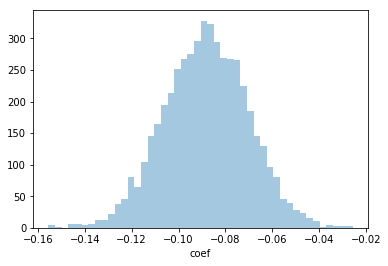

In [45]:
sns.distplot(crim_coef, kde=False)

Extract endpoints of percentile bootstrap confidence interval

In [46]:
q = utils.eqf(crim_coef)

In [47]:
(q(0.025), q(0.975))

(-0.12395984564069394, -0.05341523015107107)

Bootstrap confidence interval of correlation coefficient between `CRIM` and `target`.  This gives us a plausible range for the true correlation between these two quantities.

In [48]:
bootstrap.bootstrap_ci(a=df[["CRIM"]].join(y).values,
                       f=lambda x: np.corrcoef(x[:, 0], x[:, 1])[0, 1],
                       p=0.95,
                       b=10000,
                       ci_method="percentile",
                       random_state=2357)

(-0.6069349372897601, -0.4537151460362293)

#### Bootstrapped predictions

Alternatively, instead of returning model parameters we might wish to return the fitted models themselves and generate bootstrapped predictions.  Here we define a function that fits and returns a GBM model given a set of predictors and a response variable, and then apply this function to 500 bootstrap samples.

In [49]:
import lightgbm as lgb

def fitgbm(A):
    reg = lgb.LGBMRegressor()
    X = A[:, :A.shape[1]-1]
    y = A[:, A.shape[1]-1]
    reg.fit(X, y)
    return reg

In [50]:
boot_mod = bootstrap.bootstrap(a=df.join(y).values, f=fitgbm, b=500, random_state=2357)
boot_pred = pd.DataFrame(np.asarray([m.predict(df.values) for m in boot_mod]))
boot_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,3.274353,3.055461,3.544635,3.575082,3.559760,3.207295,3.115068,3.116506,2.702895,2.951555,...,2.983547,2.956085,3.068812,2.932023,3.013016,3.120661,3.034471,3.169812,3.239204,3.039640
1,3.182319,3.067757,3.571281,3.528224,3.582960,3.182152,2.994028,2.803870,2.716090,2.928752,...,2.959672,2.960524,3.069175,2.858126,2.925777,3.167507,2.975043,3.165337,3.139692,2.762722
2,3.173752,3.079860,3.537352,3.547876,3.564605,3.298823,3.006455,3.120260,2.635271,2.944478,...,2.958240,2.926532,2.960468,2.889740,2.872398,3.098149,3.012330,3.152478,3.125289,3.019576
3,3.180002,3.045566,3.541282,3.561116,3.547255,3.335361,3.129902,3.097080,2.821937,2.908713,...,2.969109,2.922114,3.061139,2.883476,3.018125,3.104769,3.022036,3.148377,3.124960,3.008366
4,3.242950,3.053115,3.542118,3.525466,3.596465,3.299582,3.125553,2.817256,2.701256,2.989970,...,2.962748,2.923763,2.953551,2.922948,2.813082,3.087007,2.955761,3.183434,3.080825,2.704016


In [51]:
boot_pred.shape

(500, 506)

Calculate standard deviations of bootstrapped predictions

In [52]:
pred_std = boot_pred.apply(np.std).sort_values(ascending=False)

Rows with the most variation in the bootstrapped predictions.  The values of these attributes seem to lie along the extremes of their respective distributions, which makes intuitive sense as the mode should be least confident of predictions made along the periphery of the training data.

In [53]:
df.loc[pred_std.head(10).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68


Rows with the least variation.  These appear to be average observations that occur in the center of the training data.

In [54]:
df.loc[pred_std.tail(10).index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
74,0.07896,0.0,12.83,0.0,0.4370,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78
271,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
287,0.03871,52.5,5.32,0.0,0.4050,6.209,31.3,7.3172,6.0,293.0,16.6,396.90,7.14
250,0.14030,22.0,5.86,0.0,0.4310,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90
70,0.08826,0.0,10.81,0.0,0.4130,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
288,0.04590,52.5,5.32,0.0,0.4050,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
43,0.15936,0.0,6.91,0.0,0.4480,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
321,0.18159,0.0,7.38,0.0,0.4930,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
320,0.16760,0.0,7.38,0.0,0.4930,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20


Minimum and maximum for each of attribute

In [55]:
df.apply(lambda x: pd.Series({"min": x.min(), "max": x.max()})).T

,min,max
CRIM,0.00632,88.9762
ZN,0.00000,100.0000
INDUS,0.46000,27.7400
CHAS,0.00000,1.0000
NOX,0.38500,0.8710
RM,3.56100,8.7800
AGE,2.90000,100.0000
DIS,1.12960,12.1265
RAD,1.00000,24.0000
TAX,187.00000,711.0000
